In [1]:
import argparse

import pandas as pd
import numpy as np
import scipy
import re
import gensim
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [104]:
data_test = pd.read_csv('data_test.csv')
data_train = pd.read_csv('data_train.csv')

In [105]:
data_train['title vector'] = data_train['title vector'].apply(lambda s: [float(char) for char in s.strip('[]').replace('\n', '').split()])
data_test['title vector'] = data_test['title vector'].apply(lambda s: [float(char) for char in s.strip('[]').replace('\n', '').split()])

In [106]:
frames = [data_train, data_test]
data = pd.concat(frames)

In [121]:
data.shape

(3888, 5)

In [95]:
nofired = data[data.label == 0]
nofired = nofired['title vector'].values.flatten()
nofired = np.hstack(nofired).reshape(-1,300)
pca = PCA(n_components=2)
#principalComponents_nofired = pca.fit(nofired)
nofired_reduced = pca.fit_transform(nofired)
print(pca.explained_variance_ratio_)

[0.86971972 0.05680087]


In [96]:
fired = data[data.label == 1]
fired = fired['title vector'].values.flatten()
fired = np.hstack(fired).reshape(-1,300)
fired_reduced = pca.fit_transform(fired)
print(pca.explained_variance_ratio_)

[0.78276475 0.04741409]


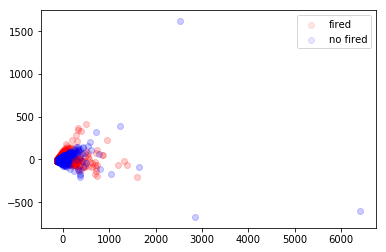

In [97]:
plt.scatter(fired_reduced[:,0],fired_reduced[:,1],color='red',label='fired',alpha=0.1)
plt.scatter(nofired_reduced[:,0],nofired_reduced[:,1],color='blue',label='no fired',alpha=0.1)
plt.legend()
plt.show()

In [55]:
from gensim import *

In [56]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [57]:
fired_mean = fired.mean(0)

In [58]:
word2vec_model.similar_by_vector(fired_mean, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7621950507164001),
 ('left_ventricular_diastolic', 0.7544535994529724),
 ('fibrin_deposition', 0.7519103288650513),
 ('transfusion_syndrome', 0.7502554655075073),
 ('lung_epithelium', 0.7492497563362122),
 ('colorectal_adenoma', 0.7491941452026367),
 ('glial_tumors', 0.7482448816299438),
 ('Genetic_predisposition', 0.7472314834594727),
 ('PLX_STROKE_targeting', 0.7470422983169556),
 ('kidney_urologic', 0.7433282732963562)]

In [59]:
nofired_mean = nofired.mean(0)
word2vec_model.similar_by_vector(nofired_mean, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Chronic_pancreatitis', 0.7613553404808044),
 ('kidney_urologic', 0.7513688206672668),
 ('fusion_enhancers', 0.7506022453308105),
 ('insulin_secreting_beta', 0.74973464012146),
 ('glial_tumors', 0.7488193511962891),
 ('PLX_STROKE_targeting', 0.7476974725723267),
 ('left_ventricular_diastolic', 0.7473434209823608),
 ('Umbilical_cord_stem_cells', 0.746474027633667),
 ('GRNOPC1_contains', 0.7452975511550903),
 ('Genetic_predisposition', 0.7444046139717102)]

In [61]:
diff = fired_mean - nofired_mean

In [62]:
word2vec_model.similar_by_vector(diff, topn=10, restrict_vocab=None)

/Users/ninatubau/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Optic_nerve', 0.7479903697967529),
 ('fibrin_deposition', 0.7479557991027832),
 ('hyperalgesia', 0.7388619184494019),
 ('fatty_infiltration', 0.7386661767959595),
 ('salivary_flow', 0.7385445833206177),
 ('microcirculatory', 0.7382302284240723),
 ('glomerular_filtration', 0.7368566989898682),
 ('alkalosis', 0.7315050363540649),
 ('adrenal_function', 0.7310791015625),
 ('calculi', 0.7267911434173584)]

In [69]:
from sklearn.cluster import KMeans
random_state = 170
from sklearn.datasets import make_blobs
n_samples=100

In [70]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [109]:
data_flat = data['title vector'].values.flatten()
data_flat = np.hstack(data_flat).reshape(-1,300)

In [110]:
data_reduced = pca.fit_transform(data_flat)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(data_reduced)


In [113]:
true_labels=list(data.label)

In [115]:
a = y_pred-true_labels

In [122]:
list(a).count(0)/(len(a))

0.5077160493827161